<a href="https://colab.research.google.com/github/Tobi-KL/mobility_profile_generation/blob/main/Mobility_Profile_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preparation

Connect to Google Drive

Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import csv
import xlrd
import random

Read Data

In [3]:
###   Read data    ###
# data_mop.pkl: Aggregationsmethode "immer die längste Aktivität"
# data_mop_priority: Aggregationsmethode "priority" (immer die Mobilitätsaktivität)

with open('/content/drive/MyDrive/Tobias_MA/Data/data_mop_priority.pkl', 'rb') as input:
        [states_mop,speed_mop,meta_mop,meta_header_mop] = pickle.load(input)

In [4]:
# nach Jahr 2017 filtern:
meta_mop_filtered = meta_mop[-3820:-1,]
states_mop_filtered = states_mop[-3820:-1,]
speed_mop_filtered = speed_mop[-3820:-1,]

In [5]:
state_names = ['not known (mobile or not mobile)', 'work', 'work', 'school,training',
               'shopping', 'private', 'bring,pick up', 'freetime', 'home', 
               'else (outside not mobile)', 'not known (not mobile)', 'by foot', 
               'bicycle', 'motorcycle', 'car driver', 'car codriver', 'public transport', 
               'long distance public-transport', 'else (mobile)', 'not known (mobile)']

no_states = int(len(np.unique(states_mop)))
timesteps = int(states_mop.shape[1])

"""
States:
0:not known (mobile or not mobile)
1:work
2:work
3:school,training
4:shopping
5:private
6:bring,pick up
7:freetime
8:home
9:else (outside not mobile)
10:not known (not mobile)
11:by foot 
12:bicycle
13:motorcycle
14:car driver
15:car codriver
16:public transport
17:long distance public-transport
18:else (mobile)
20:not known (mobile)
"""

'\nStates:\n0:not known (mobile or not mobile)\n1:work\n2:work\n3:school,training\n4:shopping\n5:private\n6:bring,pick up\n7:freetime\n8:home\n9:else (outside not mobile)\n10:not known (not mobile)\n11:by foot \n12:bicycle\n13:motorcycle\n14:car driver\n15:car codriver\n16:public transport\n17:long distance public-transport\n18:else (mobile)\n20:not known (mobile)\n'

In [6]:
# Infos über die Autos des Haushalts:

# TANK-Tabelle(2017-2018) einlesen:
# SEGMENT in Spalte [174]
# HOUSEHOLD_ID in Spalte [0]

'''
Segmente:

1 Mini
2 Kleinwagen
3 Kompaktklasse
4 Mittelklasse
5 Obere Mittelklasse
6 Oberklasse
7 Geländewagen
8 Sportwagen
9 Mini-Van
10 Großraum-Van
11 Utility
12 Wohnmobil
13 SUV
. Nicht ermittelbar
'''


csv_tank = np.genfromtxt ('/content/drive/MyDrive/Tobias_MA/Data/TANK18.csv', delimiter=";", encoding = "ISO-8859-1")
segment_codes = ['Mini', 'Kleinwagen', 'Kompaktklasse', 'Mittelklasse', 'Obere Mittelklasse', 'Oberklasse', 'Geländewagen', 'Sportwagen', 'Mini-Van', 'Großraum-Van', 'Utility', 'Wohnmobil', 'SUV', 'nicht ermittelbar']


In [7]:
# Elektroauto-Datenbank

# [:,3]: Kapazität
# [:,4]: Verbrauch nach WLTP
# [:,5]: Ladeleistung

csv_database_electric_cars = np.genfromtxt ('/content/drive/MyDrive/Tobias_MA/Data/Elektroauto_Datenbank.csv', delimiter=";", encoding = "ISO-8859-1")
print(csv_database_electric_cars)


[[  nan   nan   nan   nan   nan   nan   nan]
 [  1.    nan   nan  18.   16.1  22.    nan]
 [  2.    nan   nan  41.   16.1  46.    nan]
 [  3.    nan   nan  62.   13.4 100.    nan]
 [  4.    nan   nan  77.   14.8 190.    nan]
 [  5.    nan   nan  82.   16.5 250.    nan]
 [  6.    nan   nan  95.   16.2 250.    nan]
 [  7.    nan   nan  95.   18.9 250.    nan]
 [  8.    nan   nan  79.   18.  225.    nan]
 [  9.    nan   nan  62.   18.1 175.    nan]
 [ 10.    nan   nan 100.   27.6 110.    nan]
 [ 11.    nan   nan  40.   25.9  46.    nan]
 [ 12.    nan   nan  24.   16.5  80.    nan]
 [ 13.    nan   nan  82.   17.1 126.    nan]]


In [39]:
# Wetter Deutschland 2017

csv_weather = np.genfromtxt ('/content/drive/MyDrive/Tobias_MA/Data/Temperaturen_Deutschland_2017.csv', delimiter=";", encoding = "ISO-8859-1")
print(csv_weather.astype(int))

[[-9223372036854775808 -9223372036854775808]
 [               20820                   -6]
 [               20820                   -6]
 ...
 [               21184                    6]
 [               21184                    6]
 [               21184                    6]]


In [52]:
print(meta_mop_filtered[0,32:39])
print(meta_mop_filtered[0,0])
print(len(speed_mop_filtered[0,:]))

[21079. 21080. 21081. 21082. 21083. 21084. 21085.]
4301011559.0
1008


In [107]:
temperature_profile_new = []

i = meta_mop_filtered[0,32]
x = np.where(csv_weather[:,0]==i)



ValueError: ignored

In [125]:
start = 588
end = 732

temperature_profile = []
for i in meta_mop_filtered[0,32:39]:
  x = np.where(csv_weather[:,0]==i)
  temperature_profile.append(csv_weather[x,1].astype(int)[0])

result = np.concatenate(temperature_profile[0:7])
print(result[start:end])


[ 5  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  6  6  7  7  7  8  8  8  9  9  9 10 11 11 12 12 12 13 13 14 14 14 15 15
 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17
 17 17 17 16 16 16 16 16 16 16 16 15 15 15 15 15 14 14 14 14 13 13 13 13
 13 13 13 13 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 10
 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  8  8  8  8  8  8  8  8]


### Classes

In [9]:
# importiere alle 3 Klassen

class User_Interface:
    def __init__(self):
      pass

    def chose_household(self, number_of_occupants, number_of_drivers, number_of_cars, income, w_income, population, w_population, year_of_birth, w_year_of_birth, job, w_job):
      households = []
      for i in range(0, len(meta_mop_filtered)):
        household_1 = Household(meta_mop_filtered[i,0])
        if ((household_1.get_number_of_occupants() == number_of_occupants) & (household_1.get_number_of_drivers() == number_of_drivers) & (household_1.get_number_of_cars() == number_of_cars)):
          households.append(household_1.household_ID.astype(int))
      households = np.unique(households)

      score_array = []

      for i in range(0, len(households)):
          household_1 = Household(household_ID = households[i])

          income_hh = household_1.get_income()
          income_diff = income_hh - income
          if (income_diff == 0):
            income_points = 2
          elif (abs(income_diff) == 1):
            income_points = 1
          else:
            income_points = 0
          income_points = income_points * w_income

          population_hh = household_1.get_population()
          population_diff = population_hh - population
          if (population_diff == 0):
            population_points = 2
          elif (abs(population_diff) == 1):
            population_points = 1
          else:
            population_points = 0
          population_points = population_points * w_population

          year_of_birth_hh = household_1.get_year_of_birth()
          year_of_birth_diff = year_of_birth_hh - year_of_birth
          if (year_of_birth_diff <= 10):
            year_of_birth_points = 2
          elif (abs(year_of_birth_diff) <= 20):
            year_of_birth_points = 1
          else:
            year_of_birth_points = 0
          year_of_birth_points = year_of_birth_points * w_year_of_birth

          job_hh = household_1.get_job()
          job_diff = job_hh - job
          if (job_diff == 0):
            job_points = 2
          elif (abs(job_diff) == 1):
            job_points = 1
          else:
            job_points = 0
          job_points = job_points * w_job

          score_list = [income_points, population_points, year_of_birth_points, job_points]
          score = sum(score_list)
          score_array.append(score)

      households_fitting = [x for _, x in sorted(zip(score_array, households))]
      households_10_best_fitting = list(reversed(households_fitting))
      return households_10_best_fitting[0:10]
      # returns list of 10 best fitting households according to user input
      # first factors need to be fulfilled
      # remaining factors: score is developed based on weight -> shortest distance to best fitting -> highest score


In [67]:
# erstellt ein Haushalt-Objekt
# enthält Informationen über den gewählten Haushalt (Anzahl Bewohner, Anzahl Fahrer, alle Mobilitätsprofile der Bewohner, Position im Datensatz ... )
# vorerst: entweder zufällig oder mit bekannter ID
# TODO: Eingabemöglichkeit verschiedener Parameter (z.B. Haushaltsgröße, Einkommen etc.) -> Rückgabe einer Liste der ähnlichsten Haushalte (set-Methoden)

class Household:
    def __init__(self, household_ID):
        self.household_ID = household_ID
        #self.household_size = household_size
        self.position = np.where(meta_mop_filtered[:,0] == self.household_ID)[0]
        self.chosen_household = meta_mop_filtered.astype(int) [np.where(meta_mop_filtered[:,0] == self.household_ID)]

        """
        - Constructor of household object
        - householdID: ID of household (MOP-Data) -> sorted in ascending order
        - householdSize: # of occupants of household
        """
    
    def get_dates(self):
      return meta_mop_filtered[self.position,32:39] [0]

    def get_household(self):
      return self.chosen_household.astype(int)
    # returns chosen household (array with >= 1 entries (1 entry = 1 person, 1 year))

    def get_number_of_occupants(self):
      return self.chosen_household[0,5]
    # returns number of occupants living in chosen household
    
    def get_number_of_drivers(self):
      states = self.get_states(0,1008) # betrachte states in der ganzen Woche
      number_of_drivers = 0
      for i in range(0,len(states)):
        if ((states[i]==14).sum() > 0):
          number_of_drivers += 1
      return number_of_drivers
    # returns number of drivers (at least one state == 14) living in chosen household

    def get_drivers(self):
      states = self.get_states(0,1008) # betrachte states in der ganzen Woche
      drivers_list = []
      for i in range(0,len(states)):
          if ((states[i]==14).sum() > 0):
            drivers_list.append(self.get_data_position()[i])
      return drivers_list
    # returns list of all drivers of chosen household (nur ihre positions)
    
    def get_number_of_cars(self):
      return self.chosen_household[0,7]
    # returns number of cars of chosen household

    def get_income(self):
      return self.chosen_household[0,6]
    # returns net income of household

    def get_population(self):
      return self.chosen_household[0,4]
    # returns number of inhabitants of area

    def get_year_of_birth(self):
      return self.chosen_household[0,10]
    # returns year of birth

    def get_job(self):
      return self.chosen_household[0,11]
    # returns profession
    
    def get_data_position(self):
      position_list = []
      for i in self.position:
          position_list.append(i)
      return position_list
    # returns indeces of chosen household in data set
    
    def get_states(self, start, end):
      for i in self.position:
        return states_mop_filtered[self.position,start:end]
    # returns ALL states for timespace between start and end

    def get_adjusted_states(self, start, end):
      states = self.get_states(start,end)
      #states = np.where((states == 8) | (states == 14) | (states == 1) | (states == 2), states, 30)
      return states
    # returns adjusted states
    # 8: home; 1,2: work; 14: Car driver; 30: rest

    def get_speeds(self, start, end):
      for i in self.position:
        return speed_mop_filtered[self.position,start:end]
    # returns all speeds for timespace between start and end

    def get_persons(self, person_number):
      household_positions = self.get_data_position()
      persons = [Person (position = i, household_ID = self.household_ID) for i in household_positions]
      return persons[person_number].position
    # returns position of chosen Person-object in data set

    def get_sorted_drivers(self):
      household_drivers = self.get_drivers()
      drivers = []   
      for i in household_drivers:
        drivers.append(Person(position = i, household_ID = self.household_ID)) #erstellt für jeden driver ein Person-Object
      sorted_drivers = sorted(drivers, key=lambda x: x.total_distance, reverse=True)
      result = []
      for i in range(0,len(sorted_drivers)):
        result.append(sorted_drivers[i].position)
      return result
    # returns list with all drivers in household sorted in descending order by total distance (in whole week)
    ### testen, ob sortieren funktioniert (-> alle sind in MOP bereits absteigend sortiert!)

    def get_sorted_drivers_profiles(self, start, end):
      drivers_list = self.get_sorted_drivers()
      drivers_profiles = np.array([self.get_adjusted_states(start,end)[0]]) 
      for i in range(1, len(drivers_list)):
        drivers_profiles = np.append(drivers_profiles, [self.get_adjusted_states(start,end)[i]], axis=0) 
      return drivers_profiles
    # returns profiles of all drivers (if they don´t have to be merged)

    def get_drivers_states_profiles(self, start, end):
      if self.check_merge()==True:
        drivers_states_profiles = self.states_merge(start,end)
      else:
        drivers_states_profiles = self.get_sorted_drivers_profiles(start,end)
      return drivers_states_profiles
    # returns final states profiles for drivers  

    def check_merge(self):
      if (self.get_number_of_drivers() > self.get_number_of_cars()):
        #print("Merge necessary.")
        return True
      else:
        #print("No merge necessary.")
        return  False
    # checks whether a mobility profile merge is necessary
 
    def states_merge(self, start, end):
    # Drivers müssen bereits sortiert sein!
      x = self.get_number_of_drivers()
      while x > self.get_number_of_cars():
        drivers_positions = self.get_sorted_drivers()      #Liste aller Positionen der Drivers in data
        
        # 2. erstelle Array mit Listen aller states (für jeden driver eine Liste)
        all_states_drivers = np.array([self.get_adjusted_states(start,end)[0]]) 
        for i in range(1, len(drivers_positions)):
          all_states_drivers = np.append(all_states_drivers, [self.get_adjusted_states(start,end)[i]], axis=0)    

        # 3. betrachte ein array aus den letzten beiden Listen
        drivers_last_two = all_states_drivers[-2:]

        # 4. ziehe positions aller 14er aus der letzten Liste heraus
        list_states14_last_driver = [i for i in range(len(drivers_last_two[-1])) if drivers_last_two[-1][i] == 14]

        # 5. erzeuge eine neue Liste (vorletzte Liste komplette + 14er der letzten Liste)
        drivers_last_two_merged = all_states_drivers[-2].copy()
        for i in list_states14_last_driver:
          drivers_last_two_merged[i] = 14
        
        # 6. ersetze die letzten beiden Listen des arrays durch das neue Array
        all_states_drivers = np.delete(all_states_drivers, [-1,-2], axis=0)
        drivers_merged_profiles = np.vstack((all_states_drivers, drivers_last_two_merged))

        x -= 1
      #print("Merge completed.")
      return drivers_merged_profiles
    # returns merged states profiles

    def speed_merge(self, start, end):
    # Drivers müssen bereits sortiert sein!
      x = self.get_number_of_drivers()
      while x > self.get_number_of_cars():
        drivers_positions = self.get_sorted_drivers()      #Liste aller Positionen der Drivers in data
        
        # 2. erstelle Array mit Listen aller states (für jeden driver eine Liste) und ein Array mit Listen aller speeds
        all_states_drivers = np.array([self.get_adjusted_states(start,end)[0]])
        all_speeds_drivers = np.array([self.get_speeds(start,end)[0]]) 
        for i in range(1, len(drivers_positions)):
          all_states_drivers = np.append(all_states_drivers, [self.get_adjusted_states(start,end)[i]], axis=0)
        for i in range(1, len(drivers_positions)):
          all_speeds_drivers = np.append(all_speeds_drivers, [self.get_speeds(start,end)[i]], axis=0)
           

        # 3. betrachte ein array aus den letzten beiden Listen
        drivers_last_two_states = all_states_drivers[-2:]
        drivers_last_two_speeds = all_speeds_drivers[-2:]

        # 4. ziehe positions aller 14er aus der letzten Liste heraus
        list_states14_last_driver = [i for i in range(len(drivers_last_two_states[-1])) if drivers_last_two_states[-1][i] == 14]

        # 5. erzeuge eine neue Liste (vorletzte Liste komplette + 14er der letzten Liste)
        
        drivers_last_two_speeds_merged = all_speeds_drivers[-2].copy()
        for i in list_states14_last_driver:
          drivers_last_two_speeds_merged[i] = all_speeds_drivers[-1][i]
        
        # 6. ersetze die letzten beiden Listen des arrays durch das neue Array
        all_speeds_drivers = np.delete(all_speeds_drivers, [-1,-2], axis=0)
        drivers_merged_speed_profiles = np.vstack((all_speeds_drivers, drivers_last_two_speeds_merged))

        x -= 1
      #print("Merge completed.")
      return drivers_merged_speed_profiles
    # returns merged speed profiles

    def get_drivers_speed(self, start, end): #ohne merge (vgl. states -> umbenennen!)
      drivers_list = self.get_sorted_drivers()
      drivers_profiles = np.array([self.get_speeds(start,end)[0]])    #speeds der ersten person ##[]
      for i in range(1, len(drivers_list)):
        drivers_profiles = np.append(drivers_profiles, [self.get_speeds(start,end)[i]], axis=0) ##[]
      return drivers_profiles
    # returns array with speeds of all drivers

    def get_speeds_after_merge(self,start,end):
      if self.check_merge()==True:
        drivers_speeds_profiles = self.speed_merge(start,end)
      else:
        drivers_speeds_profiles = self.get_drivers_speed(start,end)
      return drivers_speeds_profiles

    def get_drivers_speeds_profiles(self, start, end):
      states = np.array(self.get_drivers_states_profiles(start,end))
      speeds = np.array(self.get_speeds_after_merge(start,end)) 
      mask = np.where((states==14), False, True)      #mit Hilfe der Maske werden alle Speeds, die nicht zu einem 14er state gehören, rausgefiltert
      drivers_speeds_profiles = speeds.copy()
      drivers_speeds_profiles[mask] = 0
      return drivers_speeds_profiles
    # returns final speed profiles of alle drivers (only speeds of states=14)



In [11]:
# erstellt das Mobilitätsprofil EINER Person
# dafür muss die position der Person im Datensatz angegeben werden (erste Zeile im Datensatz = Person 0)

class Person:
    def __init__(self, position, household_ID):
      self.position = position #position in data
      self.household_ID = household_ID
       
      if ((self.get_state(0,1008)==14).sum() > 0):
        self.driver_bool = True  #true, wenn person ein Fahrer ist
      else:
        self.driver_bool = False
      
      if self.driver_bool == True:
        list_1 = self.get_driver_positions(0, 1008) #Liste aller states=14
        speeds_sum = 0
        for i in list_1:
          speeds_sum = speeds_sum + self.get_single_speed(i)     #Summe aller Geschwindigkeiten (state=14) 
        mean_speed = speeds_sum / len(list_1)  # in km/h
        time = len(list_1) * 10 # in min
        distance = mean_speed * time / 60
        self.total_distance = distance
      else:
        self.total_distance = 0   


    """
    - Constructor of Person-Object
    - householdID: ID of household (MOP-Data) -> sorted in ascending order
    - position: position of individual person in data set (first line in data set = person 0)
    """

    def get_state(self, start, end):
        states = states_mop_filtered[self.position,start:end]
        return states
    # returns states for individual persons between start and end

    def get_speed(self, start, end):
        return speed_mop_filtered[self.position,start:end]
    # returns speed for timespace between start and end

    def get_single_speed(self, timestep):
        return speed_mop_filtered[self.position, timestep]
    # returns speed for one single timestep

    def get_adjusted_states(self, start, end):
        states = self.get_state(start,end)
        states_adjusted = np.where((states == 8) | (states == 14) | (states == 1) | (states == 2), states, 30)
        return states_adjusted
    # returns adjusted states for individual person
    # 8: home; 1,2: work; 14: Car driver; 30: rest

    def get_driver_positions(self, start, end):
        list_car_driver = [i for i in range(len(self.get_state(start, end))) if self.get_state(start, end)[i] == 14]
        return list_car_driver
    # returns every position in states where car driver (state=14) = true
    
    def get_total_distance(self, start, end):
      list_1 = self.get_driver_positions(start, end) #Liste aller states=14
      speeds_sum = 0
      for i in list_1:
        speeds_sum = speeds_sum + self.get_single_speed(i)     #Summe aller Geschwindigkeiten (state=14) 
      mean_speed = speeds_sum / len(list_1)  # in km/h
      time = len(list_1) * 10 # in min
      distance = mean_speed * time / 60
      return distance 
    # returns total distance driven by person in the week

In [192]:
class Car:
    def __init__(self, household_ID, car_nr):
      self.household_ID = household_ID
      self.car_nr = car_nr  # number of car in household (1st = 1, 2nd = 2 ... )
    
    """
    - Constructor of Car-Profile Object
    - householdID: ID of household (MOP-Data) -> sorted in ascending order
    """

    def get_speed_profile(self, start, end):
      household_1 = Household(household_ID = self.household_ID)
      speed_profile = household_1.get_drivers_speeds_profiles(start, end)
      return speed_profile [self.car_nr - 1]
    # returns speed profile for chosen car

    def get_state_profile(self, start, end):
      household_1 = Household(household_ID = self.household_ID)
      state_profile = household_1.get_drivers_states_profiles(start, end)
      return state_profile [self.car_nr - 1]
    # returns state profile for chosen car

    def get_segment(self):
      cars = csv_tank [np.where(csv_tank[:,0] == self.household_ID)]
      segment = cars[self.car_nr - 1 : self.car_nr , 174]
      return segment.astype(int)
    # returns segment of chosen car
    
    def get_segments(self):
      cars = csv_tank [np.where(csv_tank[:,0] == self.household_ID)] 
      segments = cars[:,174]
      return segments.astype(int)
    # returns segments of all cars in household (sorted by overall driven distance per year)
    
    def get_charging_options(self, start, end, home_charging_power, work_charging_power):
      states = self.get_state_profile(start,end)
      #charge_array = states.copy()
      charge_array = np.where((states == 8), home_charging_power, np.where((states == 1) | (states == 2), work_charging_power, np.where((states == 14), -100, 0))) 
      return charge_array
    # returns array with charging options (considers charging power at home, at work; 0 when not in use (but neither at home or work), -100 when in use)

    def get_driver_positions(self, start, end):
      list_car_driver = [i for i in range(len(self.get_state_profile(start, end))) if self.get_state_profile(start, end)[i] == 14]
      return list_car_driver
    # returns states=14 array     

    def get_distance_profile(self, start, end):
      distance = self.get_speed_profile(start,end).copy()
      for i in range(len(distance)):
        distance[i] = (1/6) * self.get_speed_profile(start,end)[i]
      return distance
    # returns array with driven distances for car object

    def get_speed_group_profile(self,start,end):
      speed_group_profile = self.get_speed_profile(start,end).copy()
      for i in range(len(speed_group_profile)):
        if speed_group_profile[i] == 0:
          speed_group_profile[i] = 0
        elif speed_group_profile[i] <= 30:
          speed_group_profile[i] = 1.473
        elif speed_group_profile[i] <= 50:
          speed_group_profile[i] = 1.08
        elif speed_group_profile[i] <= 70:
          speed_group_profile[i] = 0.955
        else:
          speed_group_profile[i] = 1.286
      return speed_group_profile
    # returns factor (for multiplying consumption) for every timestep depending on speed

    def get_temperature_profile(self,start,end):
      household_1 = Household(household_ID = self.household_ID)
      dates = household_1.get_dates()
      temperatures = []
      for i in dates:
        x = np.where(csv_weather[:,0]==i)
        temperatures.append(csv_weather[x,1].astype(int)[0])
        result = np.concatenate(temperatures[0:7])
        temperature_profile = result[start:end]
      return temperature_profile

    def get_temperature_addition(self,start,end):
      temperature_profile = self.get_temperature_profile(start,end).astype(float)
      for i in range(len(temperature_profile)):
        if temperature_profile[i] <= (-20):
          temperature_profile[i] = 4 * (1/6) #kWh in 10 Minuten       
        elif temperature_profile[i] <= (-15):
          temperature_profile[i] = 3.5 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (-10):
          temperature_profile[i] = 3 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (-5):
          temperature_profile[i] = 2.5 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (0):
          temperature_profile[i] = 2 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (5):
          temperature_profile[i] = 1.5 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (10):
          temperature_profile[i] = 1 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (15):
          temperature_profile[i] = 0.5 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (20):
          temperature_profile[i] = 0 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (25):
          temperature_profile[i] = 0.25 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (30):
          temperature_profile[i] = 0.5 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (35):
          temperature_profile[i] = 0.75 * (1/6) #kWh in 10 Minuten
        elif temperature_profile[i] <= (40):
          temperature_profile[i] = 1 * (1/6) #kWh in 10 Minuten
      return temperature_profile
   

    def get_consumption_profile(self, start, end):
      segment = self.get_segment()
      temperature_profile = self.get_temperature_addition(start,end)
      consumption = csv_database_electric_cars[segment,4]
      consumption_profile = self.get_speed_group_profile(start,end).copy()
      for i in range(len(consumption_profile)):
        distance = self.get_distance_profile(start,end)[i]  # dauert sehr lange
        speed_factor = self.get_speed_group_profile(start,end)[i]
        consumption_profile[i] = (speed_factor * distance * consumption / 100)
      for i in range(len(consumption_profile)):
        if (consumption_profile[i]!=0):
          consumption_profile[i] = consumption_profile[i] + temperature_profile[i]
      return consumption_profile
    # Einflussfaktoren: Temperatur und Durchschnittsgeschwindigkeit (Segmente nach WLTP)
    # Methode berechnet für jeden Timestep den Verbrauch basierend auf äußeren Infos und speichert es in einem array

    def get_state_of_charge_profile(self,start,end):
      state_of_charge = 100 #in kWh
      state_of_charge_profile = self.get_consumption_profile(start,end).copy()
      for i in range(len(state_of_charge_profile)):
        if (state_of_charge_profile[i] != 0):
          diff = state_of_charge_profile[i]
          state_of_charge_profile[i] = state_of_charge - diff
          state_of_charge = state_of_charge - diff
        else:
          state_of_charge_profile[i] = state_of_charge
      return state_of_charge_profile


In [196]:
ID = 4711036120
household_1 =  Household(household_ID = ID)
print(household_1.get_dates())

start = 588
end = 732

home_charging_power = 10
work_charging_power = 20

car_1 = Car(ID, 1)

distance_profile = car_1.get_distance_profile(start,end))
print(car_1.get_state_of_charge_profile(start,end, distance_profile))

[21110. 21111. 21112. 21113. 21114. 21115. 21116.]
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   10.8
 13.5  13.5  13.5  13.5  13.5  13.5  13.5  13.5  13.5   1.35  0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]


### Tool

In [ ]:
### USER INTERFACE 1: Chose Household ###

# 1.1 Input number of occupants, number of drivers and number of cars
input_number_of_occupants = 2
input_number_of_drivers = 1
input_number_of_cars = 1

# 1.2 Input preferred income (1-10), population (1-7), year of birth of one hh-member, job of one hh-member (0-8)
# 1.3 Input weight of these factors (sum of all weights = 1.0)
input_income = 6
input_w_income = 0.25

input_population = 2
input_w_population = 0.25

input_year_of_birth = 1980
input_w_year_of_birth = 0.25

input_job = 1
input_w_job = 0.25

###

input = User_Interface()
print("The following list contains (up to) 10 households in decreasing fitting to your input.\n")
print("All returned households fulfill input for number of occupants, number of drivers and number of cars.\n")
print("Fitting households:", input.chose_household(input_number_of_occupants, input_number_of_drivers, input_number_of_cars, 
                             input_income, input_w_income, input_population, input_w_population, input_year_of_birth, input_w_year_of_birth, input_job, input_w_job))
print("\n")

The following list contains (up to) 10 households in decreasing fitting to your input.

All returned households fulfill input for number of occupants, number of drivers and number of cars.

Fitting households: [8701033229, 8301011917, 4711030426, 4301014048, 8711031798, 8711031131, 8711030694, 8701033187, 8511021359, 8501026444]




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in long_scalars


In [ ]:
# Überprüfung:
household_1 = Household(8501026444)
print(household_1.get_number_of_occupants())
print(household_1.get_number_of_cars())
print(household_1.get_number_of_drivers())
print(household_1.get_income())
print(household_1.get_population())
print(household_1.get_year_of_birth())
print(household_1.get_job())

2
1
1
6
7
1961
1


Number of drivers in chosen household:  2
Number of cars in chosen household:  2 

Timesteps 588 until 732 



Car Segment of car 1 : [4] ( Mittelklasse ) 

State Profile of car 1 :
 [ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8 15 15 15 15  2  2  2  2  2  2 15 15 15 15 15 15 15 15 15 15 15  6
  6  6  6  6  6  6  6  6  6  6  6  6 11 11 11  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8 14 14 14 14 14 14 14 14 14 14 14  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8] 

Speed Profile of car 1 :
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.


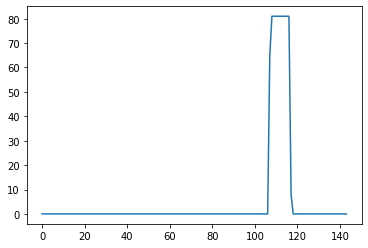

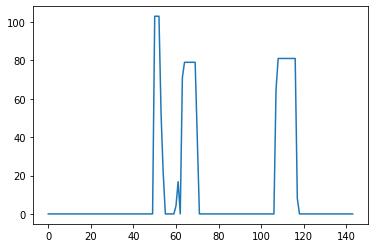

In [170]:
### USER INTERFACE 2: CREATE PROFILE ###

'''
*   Bsp. für HH mit 1 Fahrer,  1 Auto:  4301011562
*   Bsp. für HH mit 2 Fahrern, 2 Autos: 4711036120
*   Bsp. für HH mit 3 Fahrern, 3 Autos: 4301011674
*   Bsp. für HH mit 2 Fahrern, 1 Auto:  4301011871
*   Bsp. für HH mit 0 Fahrern, 1 Auto:  4301012968
'''


# 2.1 Chose a household from the list
ID = 4711036120

# 2.2 Chose timesteps
start = 588
end = 732

# 2.3 Chose charging power at home and at work
home_charging_power = 10  # in kW 
work_charging_power = 20  # in kW  

###


household_1 =  Household(household_ID = ID)
print('Number of drivers in chosen household: ', household_1.get_number_of_drivers())
print('Number of cars in chosen household: ', household_1.get_number_of_cars(),'\n')
print("Timesteps", start, "until", end, "\n")
print("\n")

for i in range(household_1.get_number_of_cars()):
  car_1 = Car(household_ID = ID, car_nr = i+1)
  print("Car Segment of car", i+1, ":", car_1.get_segment(),'(', segment_codes[car_1.get_segment() [0] - 1], ')', '\n')
  print("State Profile of car", i+1, ":\n", car_1.get_state_profile(start,end),'\n')
  print("Speed Profile of car", i+1, ":\n", car_1.get_speed_profile(start,end),'\n')
  print("Consumption Profile of car", i+1, ":\n", car_1.get_consumption_profile(start,end),'\n')
  print("Charging Options car", i+1, ":\n", car_1.get_charging_options(start,end,home_charging_power,work_charging_power),'\n')
  print("\n")

# Speed Plots:
print("Speed plots:\n")
for i in range(household_1.get_number_of_cars()):
  car_1 = Car(household_ID = ID, car_nr = i+1)
  plt.figure(i)
  plt.plot(car_1.get_speed_profile(start,end))
  

To do:

- Ladeprofil: Array mit kWh pro timestep (+ bei Laden, 0 bei 100% Akkustand, - bei Fahren)
- Berücksichtigung der Temperatur langsameres Laden (gemäß Recherche)
  - für Min-Strategie
  - für Max-Strategie
- elektrische Nachfrage: Aggregieren Ladeprofil -> kWh Verbrauch

Ideen zu Ladeprofilen:
- array mit state of charge
  - verliert x% pro 10 Minuten  (abhängig von temperatur?)
  - verliert bei 14er Fahrt
  - wird auf Arbeit/daheim geladen (Geschwindigkeit abhängig von state of charge)
  - je 1 mal für jede Strategie

Max-Strategie:
- lade jedes Mal, wenn zuhause mit voller Leistung bis 100% state of charge erreicht sind

Min-Strategie:
- lade kurz vor Abfahrt

- array Strombedarf zuhause
  - alle Ladevorgänge (Autobedarf + x% Ladeverlust (abhängig von Temperatur?))
  - aggregieren über alle Autos
- array Strombedarf Arbeit
  alle Ladevorgänge (Autobedarf + x% Ladeverlust (abhängig von Temperatur?))


In [ ]:
# Haushalts-Auswahl

# 1. Faktoren, die erfüllt sein müssen
eingabe_anzahl_bewohner = 2
eingabe_anzahl_fahrer = 2
eingabe_anzahl_fahrzeuge = 7

# 2. Faktoren, die erfüllt sein können -> Score, wie gut erfüllt sie werden
eingabe_einkommen = 6
gewichtung_einkommen = 0.25

eingabe_einwohnerzahl = 2
gewichtung_einwohnerzahl = 0.25

eingabe_geburtsjahr = 1980
gewichtung_geburtsjahr = 0.25

eingabe_beruf = 1
gewichtung_beruf = 0.25

# eingabe_fahrleistung -> muss berechnet werden (methode in Person), sehr schwer

### Implementierung:
# 1.
result = []
for i in range(0, len(meta_mop_filtered)):
  household_1 = Household(meta_mop_filtered[i,0])
  number_of_ocupants = household_1.get_number_of_occupants()
  number_of_drivers = household_1.get_number_of_drivers()
  number_of_cars = household_1.get_number_of_cars()
  if ((number_of_ocupants == eingabe_anzahl_bewohner) & (number_of_drivers == eingabe_anzahl_fahrer) & (number_of_cars == eingabe_anzahl_fahrzeuge)):
    result.append(household_1.household_ID.astype(int))

possible_households = np.unique(result)
print(len(possible_households))
print(possible_households)

0
[]


In [ ]:
score_array = []

for i in range(0, len(possible_households)):
    household_1 = Household(household_ID = possible_households[i])

    income = household_1.get_income()
    income_diff = income - eingabe_einkommen
    if (income_diff == 0):
      income_points = 2
    elif (abs(income_diff) == 1):
      income_points = 1
    else:
      income_points = 0
    income_points = income_points * gewichtung_einkommen

    inhabitants = household_1.get_number_of_inhabitants()
    inhabitants_diff = inhabitants - eingabe_einwohnerzahl
    if (inhabitants_diff == 0):
      inhabitants_points = 2
    elif (abs(inhabitants_diff) == 1):
      inhabitants_points = 1
    else:
      inhabitants_points = 0
    inhabitants_points = inhabitants_points * gewichtung_einwohnerzahl

    year_of_birth = household_1.get_year_of_birth()
    yob_diff = year_of_birth - eingabe_geburtsjahr
    if (yob_diff <= 10):
      yob_points = 2
    elif (abs(yob_diff) <= 20):
      yob_points = 1
    else:
      yob_points = 0
    yob_points = yob_points * gewichtung_geburtsjahr

    profession = household_1.get_profession()
    profession_diff = profession - eingabe_beruf
    if (profession_diff == 0):
      profession_points = 2
    elif (abs(profession_diff) == 1):
      profession_points = 1
    else:
      profession_points = 0
    profession_points = profession_points * gewichtung_beruf

    score_list = [income_points, inhabitants_points, yob_points, profession_points]
    score = sum(score_list)
    score_array.append(score)

print(score_array)
print(len(score_array))


[0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 0.5, 1.5, 1.0, 0.5, 0.5, 0.75, 1.0, 0.5, 1.5, 1.0, 0.75, 0.5, 0.5, 1.0, 2.0, 1.0, 0.5, 1.0, 1.5, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.5, 2.0, 2.0, 1.0, 1.5, 0.5, 0.5, 1.0, 1.25, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.5, 0.5, 1.0, 1.0, 0.5, 1.5, 1.0, 0.5, 1.0, 1.5, 1.0, 0.5, 1.0, 1.5, 0.5, 1.5, 1.0, 1.0, 0.75, 0.75, 0.5, 1.0, 1.0, 0.5, 1.0, 1.75, 1.0, 2.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.5, 1.0, 2.0, 1.5, 1.0, 0.75, 1.5, 0.75, 0.5, 0.5, 1.0, 0.5, 1.0, 1.75, 1.0, 1.5, 1.5, 1.0, 0.5, 1.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.5, 1.0, 1.5, 0.75, 1.0, 1.0, 1.5, 1.5, 2.0, 1.0, 1.0, 2.0, 0.75, 1.0, 1.0, 1.0, 1.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 0.75, 0.5, 1.75, 1.5, 1.0, 2.0, 1.0, 0.5, 1.0, 1.25, 1.5, 0.75, 1.0, 1.0, 1.0, 1.5, 0.5, 1.5, 1.0, 1.0, 1.0, 1.25, 1.0, 1.5, 1.0, 1.0, 1.5, 2.0, 1.5, 1.75, 1.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]
167


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in long_scalars
  import sys


In [ ]:
z = [x for _, x in sorted(zip(score_array, possible_households))]
z_final = list(reversed(z))
print(z_final[0:10])

[8701034836, 8501023247, 4711031623, 4711030931, 4701032819, 4511022052, 4311012474, 4311012420, 4311011266, 4311010963]


In [ ]:
states = self.get_states(0,1008) # betrachte states in der ganzen Woche
number_of_drivers = 0
for i in range(0,len(states)):
  if ((states[i]==14).sum() > 0):
    number_of_drivers += 1
return number_of_drivers

In [ ]:
ID = 4711036120
household_1 =  Household(household_ID = ID)

start = 588
end = 732

home_charging_power = 10
work_charging_power = 20

car_1 = Car(ID, 1)
print(car_1.get_charging_options(start,end,home_charging_power,work_charging_power))

[  10   10   10   10   10   10   10   10   10   10   10   10   10   10
   10   10   10   10   10   10   10   10   10   10   10   10   10   10
   10   10   10   10   10   10   10   10   10   10   10   10   10   10
   10   10   10   10   10   10   10   10    0    0    0    0   20   20
   20   20   20   20    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   10   10   10   10   10   10   10   10   10   10   10
   10   10   10   10   10   10   10   10   10 -100 -100 -100 -100 -100
 -100 -100 -100 -100 -100 -100   10   10   10   10   10   10   10   10
   10   10   10   10   10   10   10   10   10   10   10   10   10   10
   10   10   10   10]


In [ ]:
'''
*   Bsp. für HH mit 1 Fahrer,  1 Auto:  4301011562
*   Bsp. für HH mit 2 Fahrern, 2 Autos: 4711036120
*   Bsp. für HH mit 3 Fahrern, 3 Autos: 4301011674
*   Bsp. für HH mit 2 Fahrern, 1 Auto:  4301011871
*   Bsp. für HH mit 0 Fahrern, 1 Auto:  4301012968
'''

household_1 =  Household(household_ID = 4301011674)

start = 0
end = 144

x = household_1.get_drivers_states_profiles(start,end)
y = household_1.get_drivers_speeds_profiles(start,end)

print('\nDriver Profiles of household:\n', x)
print('\nSpeed Profiles of household:\n', y)

In [ ]:
# Erstellung eines Haushalt-Objekts in meta_mop_filtered
# ansonsten: gewünschte ID eingeben

household_1 =  Household(household_ID = 4301011674)
#household_1.get_household()

In [ ]:
# Anzahl Bewohner des Haushalts
# Anzahl Fahrer im Haushalt
# Anzahl Autos im Haushalt

print('number of occupants in chosen household: ', household_1.get_number_of_occupants())
print('number of drivers in chosen household: ', household_1.get_number_of_drivers())
print('number of cars in chosen household: ', household_1.get_number_of_cars())

In [ ]:
# Informationen über die Position des Haushalts bzw. der Personen im Datensatz (filtered: nur 2017)
# gibt die Position der gewünschten Person im Datensatz an. (0 = erste Person des HH usw.)

print('The household can be found in the data set at row(s): ', household_1.get_data_position())

person_number = 0     # 0: first person, 1: second person ...
print('Person', person_number, 'can be found in the data set at row: ', household_1.get_persons(person_number))

# gebe drivers aus:
print('Drivers of household:', household_1.get_drivers())

In [ ]:
# Ausgabe der Mobilitätsprofile

start = 0    # timesteps
end = 504
person_number = 0

mobility_profiles = household_1.get_states(start,end)

print('Mobility profile of person', person_number, ':')
plt.plot(mobility_profiles[person_number])

In [ ]:
# Ausgabe der Speed-Profiles

start = 0     # timesteps
end = 504
person_number = 0

speed_profiles = household_1.get_speeds(start, end)

print('Speed profile of person', person_number, ':')
plt.plot(speed_profiles[person_number])

In [ ]:
# Ausgabe der States eines individuellen HH-Mitglieds
person_number = 0
household_ID = household_1.household_ID
start = 0
end = 504


# erstelle Person Objekt:
person_1 = Person (position = household_1.get_persons(person_number), household_ID = household_ID)
print('original states for person', person_number,':\n', person_1.get_state(start,end))
print('\n')

# setze alle states außer 1,2 (work), 8 (home), 14 (car driver) auf 30??
print('adjusted states for person', person_number, ':\n', person_1.get_adjusted_states(start, end))
print('\n')

print('Person', person_number, 'is a driver:', person_1.driver_bool)
print('Person', person_number, 'drove the following total distance (km) in one weeek:', person_1.total_distance)

# Liste aller Positionen "Car Driver":
print('positions where car driver is true for person', person_number,':\n', person_1.get_driver_positions(start, end))

### Test

In [32]:
# Datum konvertieren

dates = meta_mop_filtered[0,32:38]
dates = pd.to_timedelta(ser, unit='D') + pd.Timestamp('1960-1-1')
print(dates)

DatetimeIndex(['2017-09-17', '2017-09-18', '2017-09-19', '2017-09-20',
               '2017-09-21', '2017-09-22'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
# Erklärung Funktion merge()

household_1 =  Household(household_ID = 4301011871)

# Funktioniert nur für Haushalte mit mind. 2 Drivers (vorher check laufen lassen)
# 1. positions aller driver des HH
drivers_positions = household_1.get_drivers()
print('Drivers:\n', drivers_positions)
print('-----')

# 2. erstelle Array mit Listen aller states (für jeden driver eine Liste)
all_states_drivers = np.array([household_1.get_states(0,14)[0]])
for i in range(1, len(drivers_positions)):
  all_states_drivers = np.append(all_states_drivers, [household_1.get_states(0,14)[i]], axis=0)
print('States aller Drivers:\n', all_states_drivers)
print('-----')

# 3. betrachte ein array aus den letzten beiden Listen
drivers_last_two = all_states_drivers[-2:]
print('Die letzten beiden Einträge des Arrays:\n', drivers_last_two)
print('-----')

# 4. ziehe positions aller 14er aus der letzten Liste heraus
list_states14_last_driver = [i for i in range(len(drivers_last_two[-1])) if drivers_last_two[-1][i] == 14]
print('Alle 14er states aus dem LETZTEN Eintrag:\n', list_states14_last_driver)
print('-----')

# 5. erzeuge eine neue Liste (vorletzte Liste komplette + 14er der letzten Liste)
drivers_last_two_merged = all_states_drivers[-2].copy()
for i in list_states14_last_driver:
  drivers_last_two_merged[i] = 14
print('VORletzter Eintrag, ergänzt mit den 14ern des LETZTEN Eintrags:\n', drivers_last_two_merged)
print('-----')

# 6. ersetze die letzten beiden Listen des arrays durch das neue Array
all_states_drivers = np.delete(all_states_drivers, [-1,-2], axis=0)
drivers_merged = np.vstack((all_states_drivers, drivers_last_two_merged))
print('Merge abgeschlossen. Das folgende Array hat die letzten beiden Drivers zusammengefasst: besteht aus den States des vorletzten Drivers, ergänzt durch die 14er des letzten Drivers:\n', drivers_merged)